In [2]:
import pandas as pd
import numpy as np

#Command to install OpenCage Geocoder for fetching Lat and Lng of  Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

# the package below required to normalize the data returned by the Foursquare API
from pandas.io.json import json_normalize

#importing KMeans from the Scikit library to classify neighborhoods into clusters
from sklearn.cluster import KMeans

print("All necessary libraries imported now")

Matplotlib version:  3.0.2
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ---------------------------------------------------------

In [5]:
vnc_crimedata_df=pd.read_csv('https://github.com/Madhumita80/Coursera_Capstone/blob/master/crime_records_2019.csv?raw=true',index_col=None)
vnc_crimedata_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5457109.822
1,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5459174.338
2,Break and Enter Commercial,2019,6,9,10,58,10XX BEACH AVE,West End,490232.6157,5458203.356
3,Break and Enter Commercial,2019,1,6,1,36,10XX BEACH AVE,West End,490234.4136,5458201.015
4,Break and Enter Commercial,2019,7,21,11,21,10XX BEACH AVE,Central Business District,490249.2307,5458166.833


In [6]:
vnc_crimedata_df.drop(['MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis = 1, inplace = True)

vnc_crimedata_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Break and Enter Commercial,2019,3,7,2,Fairview
1,Break and Enter Commercial,2019,8,27,4,West End
2,Break and Enter Commercial,2019,6,9,10,West End
3,Break and Enter Commercial,2019,1,6,1,West End
4,Break and Enter Commercial,2019,7,21,11,Central Business District


In [7]:
# Let us change the uppercase column names to lowercase
vnc_crimedata_df.columns=['Type', 'Year', 'Month',' Day','Hour','Neighbourhood']
vnc_crimedata_df.head()

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2019,3,7,2,Fairview
1,Break and Enter Commercial,2019,8,27,4,West End
2,Break and Enter Commercial,2019,6,9,10,West End
3,Break and Enter Commercial,2019,1,6,1,West End
4,Break and Enter Commercial,2019,7,21,11,Central Business District


In [8]:
# Now, let us calculate the total crimes committed in each neighbourhood in 2019
vnc_crimedata_df['Neighbourhood'].value_counts()

Central Business District    10618
West End                      2864
Mount Pleasant                2219
Strathcona                    1928
Fairview                      1827
Grandview-Woodland            1613
Renfrew-Collingwood           1503
Kitsilano                     1426
Kensington-Cedar Cottage      1363
Hastings-Sunrise              1229
Sunset                         893
Riley Park                     828
Marpole                        771
Victoria-Fraserview            530
Killarney                      507
Oakridge                       491
Kerrisdale                     382
South Cambie                   367
Dunbar-Southlands              329
West Point Grey                323
Shaughnessy                    266
Arbutus Ridge                  263
Stanley Park                   167
Musqueam                        10
Name: Neighbourhood, dtype: int64

In [8]:
# Now, we will scrap data from the Wikipedia page to find out additional information of neighbourhoods and borough
column_names = ['Neighbourhood', 'Borough'] 
vnc_neighbor = pd.DataFrame(columns=column_names)
vnc_neighbor['Neighbourhood'] = vnc_crimedata_df['Neighbourhood'].unique()
neigh_bor_dict = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'East Side',
                  'Killarney':'East Side', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'South Vancouver', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(neigh_bor_dict, vnc_neighbor['Neighbourhood']):
  vnc_neighbor.loc[vnc_neighbor.Neighbourhood == row, 'Borough'] = neigh_bor_dict.get(row)

vnc_neighbor.dropna(inplace=True)

print("Total Neighbourhood Count",len(vnc_neighbor['Neighbourhood']),"Borough Count",len(vnc_neighbor['Borough'].unique()))

vnc_neighbor.head()

Total Neighbourhood Count 24 Borough Count 4


,Neighbourhood,Borough
0,Fairview,West Side
1,West End,Central
2,Central Business District,Central
3,Grandview-Woodland,East Side
4,Mount Pleasant,East Side


In [9]:
#Now we will merge the Vancouver Crime Data table with the Neighbor Boroughs Table to include the Boroughs data
vnc_crime_inboroughs = pd.merge(vnc_crimedata_df,vnc_neighbor, on='Neighbourhood')

vnc_crime_inboroughs.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Borough
0,Break and Enter Commercial,2019,3,7,2,Fairview,West Side
1,Break and Enter Commercial,2019,4,21,16,Fairview,West Side
2,Break and Enter Commercial,2019,10,26,0,Fairview,West Side
3,Break and Enter Commercial,2019,3,27,8,Fairview,West Side
4,Break and Enter Commercial,2019,7,13,1,Fairview,West Side


In [10]:
# Let us find out total crimes in each borough
vnc_crime_inboroughs.dropna(inplace=True)
vnc_crime_inboroughs['Borough'].value_counts()

Central            13649
East Side          12613
West Side           5674
South Vancouver      781
Name: Borough, dtype: int64

In [11]:
vnc_crime_cat = pd.pivot_table(vnc_crime_inboroughs,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                774                               192   
East Side                              787                               961   
South Vancouver                         56                               104   
West Side                              347                               697   
All                                   1964                              1954   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2003        2473               7041              696   
East Side           2141        1574               5215              745   
South Vancouver       96         118                290               35   
West Side            749         701               2273              506   
All                 4989        4866              14819             1982   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      251   
East Side                    714   
South Vancouver               33   
West Side                    202   
All                         1200   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        8       
South Vancouver                                                  1       
West Side                                                        2       
All                                                             12       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        218    13649  
East Side                                                      468    12613  
South Vancouver                                                 48      781  
West Side                                                      197     5674  
All                                                            931    32717

<h2> Borough Crime Analysis </h2>
As we can see from the above table and earlier analysis that South Vancouver has the minimum crime rate and also the 'Break and Enter Commercial' type of crime is minimum. But, South Vancouver has the minimum number of neighbourhoods also and hence the crime rate may be less , so we will consider the next safe borough which is West Side. Also, the 'Break And Enter Commercial' type crime is much less in West Side borough.

In [12]:
vnc_crime_cat.reset_index(inplace = True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total'}, inplace=True)
vnc_crime_cat = vnc_crime_cat.head(4)
vnc_crime_cat


,Borough,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,774,192,2003,2473,7041,696,251,1,218,13649
1,East Side,787,961,2141,1574,5215,745,714,8,468,12613
2,South Vancouver,56,104,96,118,290,35,33,1,48,781
3,West Side,347,697,749,701,2273,506,202,2,197,5674


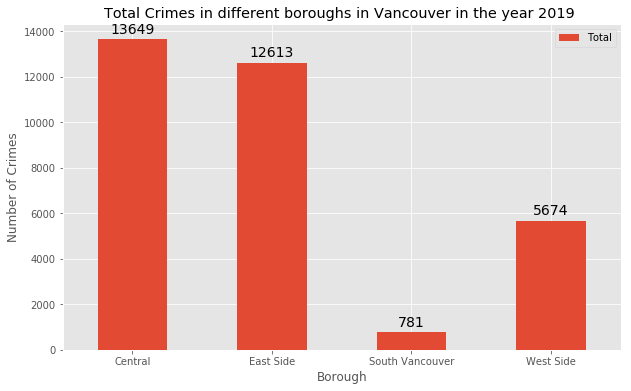

In [13]:
# Bar Chart to show the boroughs and the total crimes in each borough

per_borough = vnc_crime_cat[['Borough','Total']]
per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Total Crimes in different boroughs in Vancouver in the year 2019 ')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

<h2> My crime analysis report<h2>

<p>  As we can see from the above table and earlier analysis that South Vancouver has the minimum crime rate and also the 'Break and Enter Commercial' type of crime is minimum. But, South Vancouver has the minimum number of neighbourhoods also and hence the crime rate may be less , so we will consider the next safe borough which is West Side. Also, the 'Break And Enter Commercial' type crime is much less in West Side borough. <p>

In [14]:
# We will focus henceforth only on the West Side borough and explore its neighbourhoods

vnc_ws_neigh = vnc_crime_inboroughs

vnc_ws_neigh = vnc_ws_neigh[vnc_ws_neigh['Borough'] == 'West Side']
vnc_ws_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in West Side Borough', len(vnc_ws_neigh['Neighbourhood'].unique()))

vnc_ws_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in West Side Borough 9


array(['Fairview', 'Shaughnessy', 'Kerrisdale', 'Kitsilano', 'Oakridge',
       'West Point Grey', 'Arbutus Ridge', 'South Cambie',
       'Dunbar-Southlands'], dtype=object)

In [15]:

Latitude = []
Longitude = []
Borough = []
Neighbourhood = vnc_ws_neigh['Neighbourhood'].unique()

key = '51fe2f8fc0554e62829b69f4377ee41d'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('West Side')
print(Latitude, Longitude)

[49.2641128, 49.2518626, 49.2346728, 49.2694099, 49.2308288, 49.2644843, 49.2409677, 49.2466847, 49.2534601] [-123.1268352, -123.1380226, -123.1553893, -123.155267, -123.1311342, -123.1854326, -123.1670008, -123.120915, -123.1850439]


In [16]:
ws_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ws_neig_geo = pd.DataFrame(data=ws_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

ws_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,Fairview,West Side,49.264113,-123.126835
1,Shaughnessy,West Side,49.251863,-123.138023
2,Kerrisdale,West Side,49.234673,-123.155389
3,Kitsilano,West Side,49.269410,-123.155267
4,Oakridge,West Side,49.230829,-123.131134
5,West Point Grey,West Side,49.264484,-123.185433
6,Arbutus Ridge,West Side,49.240968,-123.167001
7,South Cambie,West Side,49.246685,-123.120915
8,Dunbar-Southlands,West Side,49.253460,-123.185044


In [17]:
# Now, we will fetch geographical coordinates of Vancouver
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinates of Vancouver, Canada are {}, {}.'.format(latitude, longitude))


The geograpical coordinates of Vancouver, Canada are 49.2608724, -123.1139529.


In [18]:
# Now we will use Folium to plot West Side Borough in Vancouver and its Neighbourhood
vancouver_westside_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(ws_neig_geo['Latitude'], ws_neig_geo['Longitude'], ws_neig_geo['Borough'], ws_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(vancouver_westside_map)  
    
vancouver_westside_map

In [3]:
# Now we need to set up the four square credentials
CLIENT_ID = '5EH5SMGTSPN02O1VIP4UKCMZAFZJGZD4J02ZVJKNVR1S1X0U'
CLIENT_SECRET = 'IQ43H03L3GREX15IMI01JDNEDBOS2SOWF2X34HVAFOXIBWP4'
VERSION = '20200725'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5EH5SMGTSPN02O1VIP4UKCMZAFZJGZD4J02ZVJKNVR1S1X0U
CLIENT_SECRET:IQ43H03L3GREX15IMI01JDNEDBOS2SOWF2X34HVAFOXIBWP4


In [20]:
# Now, let us define a function to get the top 10 venues around a given neighbourhood
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    return(nearby_venues)

In [21]:
vnc_ws_venues = getNearbyVenues(names=ws_neig_geo['Neighbourhood'],
                                   latitudes=ws_neig_geo['Latitude'],
                                   longitudes=ws_neig_geo['Longitude']
                                  )

Fairview
Shaughnessy
Kerrisdale
Kitsilano
Oakridge
West Point Grey
Arbutus Ridge
South Cambie
Dunbar-Southlands


In [22]:
# Now let us print the dataframe with neighbourhoods and its venues

print(vnc_ws_venues.shape)
vnc_ws_venues.head()

(191, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Fairview,49.264113,-123.126835,Gyu-Kaku Japanese BBQ,BBQ Joint
1,Fairview,49.264113,-123.126835,CRESCENT nail and spa,Nail Salon
2,Fairview,49.264113,-123.126835,Salmon 'n' Bannock,Restaurant
3,Fairview,49.264113,-123.126835,Finlandia Pharmacy,Pharmacy
4,Fairview,49.264113,-123.126835,Charleson Park,Park


In [23]:
# This is to calculate the total venues of each neighbourhood

vnc_ws_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Arbutus Ridge,5
Dunbar-Southlands,6
Fairview,26
Kerrisdale,40
Kitsilano,48
Oakridge,8
Shaughnessy,3
South Cambie,15
West Point Grey,40


In [24]:
print('There are {} uniques categories.'.format(len(vnc_ws_venues['Venue Category'].unique())))

There are 83 uniques categories.


In [25]:
# one hot encoding
vnc_onehot = pd.get_dummies(vnc_ws_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vnc_onehot['Neighbourhood'] = vnc_ws_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [vnc_onehot.columns[-1]] + list(vnc_onehot.columns[:-1])
vnc_onehot = vnc_onehot[fixed_columns]

vnc_onehot.head()

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,...,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Wine Shop,Yoga Studio
0,Fairview,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
vnc_onehot.shape

(191, 84)

In [27]:
vnc_grouped = vnc_onehot.groupby('Neighbourhood').mean().reset_index()
vnc_grouped.head()

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,...,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfall,Wine Shop,Yoga Studio
0,Arbutus Ridge,0.000000,0.0,0.000000,0.000000,0.200000,0.000,0.0,0.000000,0.000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,Dunbar-Southlands,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.000000,0.000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,Fairview,0.000000,0.0,0.076923,0.038462,0.000000,0.000,0.0,0.000000,0.000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.038462,0.038462,0.0,0.000000
3,Kerrisdale,0.000000,0.0,0.025000,0.000000,0.025000,0.025,0.0,0.000000,0.025,...,0.050000,0.000000,0.025000,0.0,0.000000,0.0,0.025000,0.000000,0.0,0.000000
4,Kitsilano,0.041667,0.0,0.020833,0.000000,0.083333,0.000,0.0,0.020833,0.000,...,0.020833,0.020833,0.041667,0.0,0.020833,0.0,0.000000,0.000000,0.0,0.020833


In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:

indicators = ['st', 'nd', 'rd']
num_top_venues = 10
# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = vnc_grouped['Neighbourhood']

for ind in np.arange(vnc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vnc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Nightlife Spot,Bakery,Pet Store,Grocery Store,Spa,Gastropub,Dessert Shop,Diner,Falafel Restaurant,Fast Food Restaurant
1,Dunbar-Southlands,Sushi Restaurant,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Coffee Shop,Yoga Studio,French Restaurant,Deli / Bodega,Dessert Shop,Diner
2,Fairview,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Pharmacy,Chinese Restaurant,Diner,Nail Salon,Falafel Restaurant,Restaurant
3,Kerrisdale,Chinese Restaurant,Coffee Shop,Tea Room,Sandwich Place,Pharmacy,Sushi Restaurant,Convenience Store,Hobby Shop,Pizza Place,Liquor Store
4,Kitsilano,Bakery,American Restaurant,Coffee Shop,Japanese Restaurant,Restaurant,Ice Cream Shop,French Restaurant,Sushi Restaurant,Food Truck,Thai Restaurant


In [31]:
# Let us cluster neighbourhoods using kmeans clustering

# set number of clusters
kclusters = 5

vnc_grouped_clustering = vnc_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vnc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 1, 1, 4, 2, 1, 1], dtype=int32)

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = ws_neig_geo

# merge toronto_grouped with Vancouver data to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vancouver_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fairview,West Side,49.264113,-123.126835,1,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Pharmacy,Chinese Restaurant,Diner,Nail Salon,Falafel Restaurant,Restaurant
1,Shaughnessy,West Side,49.251863,-123.138023,2,Park,Bus Stop,French Restaurant,Yoga Studio,Dessert Shop,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck,Gastropub
2,Kerrisdale,West Side,49.234673,-123.155389,1,Chinese Restaurant,Coffee Shop,Tea Room,Sandwich Place,Pharmacy,Sushi Restaurant,Convenience Store,Hobby Shop,Pizza Place,Liquor Store
3,Kitsilano,West Side,49.269410,-123.155267,1,Bakery,American Restaurant,Coffee Shop,Japanese Restaurant,Restaurant,Ice Cream Shop,French Restaurant,Sushi Restaurant,Food Truck,Thai Restaurant
4,Oakridge,West Side,49.230829,-123.131134,4,Israeli Restaurant,Fast Food Restaurant,Café,Pharmacy,Sandwich Place,Sushi Restaurant,Convenience Store,Vietnamese Restaurant,Falafel Restaurant,Deli / Bodega


In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:
# Let us examine the resulting clusters

vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,West Side,Nightlife Spot,Bakery,Pet Store,Grocery Store,Spa,Gastropub,Dessert Shop,Diner,Falafel Restaurant,Fast Food Restaurant


In [35]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Side,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Pharmacy,Chinese Restaurant,Diner,Nail Salon,Falafel Restaurant,Restaurant
2,West Side,Chinese Restaurant,Coffee Shop,Tea Room,Sandwich Place,Pharmacy,Sushi Restaurant,Convenience Store,Hobby Shop,Pizza Place,Liquor Store
3,West Side,Bakery,American Restaurant,Coffee Shop,Japanese Restaurant,Restaurant,Ice Cream Shop,French Restaurant,Sushi Restaurant,Food Truck,Thai Restaurant
5,West Side,Japanese Restaurant,Café,Pizza Place,Pub,Vegetarian / Vegan Restaurant,Coffee Shop,Sushi Restaurant,Sporting Goods Shop,Fast Food Restaurant,Pet Store
7,West Side,Coffee Shop,Malay Restaurant,Cantonese Restaurant,Bus Stop,Park,Shopping Mall,Sushi Restaurant,Grocery Store,Gift Shop,Bank


In [36]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,West Side,Park,Bus Stop,French Restaurant,Yoga Studio,Dessert Shop,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck,Gastropub


In [37]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,West Side,Sushi Restaurant,Italian Restaurant,Indian Restaurant,Ice Cream Shop,Coffee Shop,Yoga Studio,French Restaurant,Deli / Bodega,Dessert Shop,Diner


In [38]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,West Side,Israeli Restaurant,Fast Food Restaurant,Café,Pharmacy,Sandwich Place,Sushi Restaurant,Convenience Store,Vietnamese Restaurant,Falafel Restaurant,Deli / Bodega


<h2> Based on the above analysis, the grocery stores are much less common in clusters( with labels 2, 3, 4) and therefore ideal for setting up one.</h2>